In [1]:
#import necessary libraries
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage as nd
from tensorflow import keras
%matplotlib inline
import pylab as pl
from IPython import display


import sys
sys.path.append("..") # Adds higher directory to python modules path.

import branchingdnn as branching
from branchingdnn import core
from branchingdnn.utils import * 
from branchingdnn.profiler import model_profiler as profiler
from branchingdnn.dataset import prepare
from branchingdnn.branches import branch


Using TensorFlow backend.


In [11]:
 # convert class vectors to binary class matrices
batch_size = 32
dataset = tf.keras.datasets.mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = dataset
train_images = train_images.reshape(60000, 784).astype("float32") / 255
test_images = test_images.reshape(10000, 784).astype("float32") / 255


train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)
def augment_images(image, label,input_size=(227,227), channel_first = False):
            # Normalize images to have a mean of 0 and standard deviation of 1
            # image = tf.image.per_image_standardization(image)
            image = tf.reshape(image,(28,28,1))
            # Resize images from 32x32 to 277x277
            # image = tf.image.resize(image,input_size)
            # if channel_first:
            #     image = tf.transpose(image, [2, 0, 1])
            
            return image, label

validation_images, validation_labels = train_images[:12000], train_labels[:12000]
train_images, train_labels = train_images[12000:], train_labels[12000:] # now remove the validation set from the training set.
train_ds = tf.data.Dataset.from_tensor_slices(((train_images,train_labels)))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

train_ds_size = len(list(train_ds))
test_ds_size = len(list(test_ds))
validation_ds_size = len(list(validation_ds))
train_ds = (train_ds.map(augment_images))
validation_ds = (validation_ds.map(augment_images))
test_ds = (test_ds.map(augment_images))

# target = tf.data.Dataset.from_tensor_slices((train_labels))
# train_ds = tf.data.Dataset.zip((train_ds,target))

# v_target = tf.data.Dataset.from_tensor_slices((validation_labels))
# validation_ds = tf.data.Dataset.zip((validation_ds,v_target))


train_ds = (train_ds
    # .map(prepare.augment_images)
    .shuffle(buffer_size=int(train_ds_size),reshuffle_each_iteration=True)
    .batch(batch_size=batch_size, drop_remainder=True))
test_ds = (test_ds
    # .map(prepare.augment_images)
    .shuffle(buffer_size=int(test_ds_size)) ##why would you shuffle the test set?
    .batch(batch_size=1, drop_remainder=True))

validation_ds = (validation_ds
    # .map(prepare.augment_images)
    .shuffle(buffer_size=int(validation_ds_size))
    .batch(batch_size=batch_size, drop_remainder=True))


In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "imagenette2-320/train/",
#   validation_split=0.2,
#   subset="training",
  seed=123,
  image_size=(320, 320),
  batch_size=32)

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y,10)))#.shuffle(buffer_size=tf.cast(7576,'int64'))
def augment_images(image, label,input_size=(32,32), channel_first = False):
            image = tf.image.resize(image,input_size)
            return image, label
train_ds = (train_ds.map(augment_images))

image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
print(image_batch[0])
print("label", labels_batch[0])
# Notice the pixels values are now in `[0,1]`.

Found 9469 files belonging to 10 classes.
tf.Tensor(
[[[0.3384804  0.35710788 0.35465688]
  [0.36911768 0.40735298 0.42549023]
  [0.27205884 0.32009804 0.2916667 ]
  ...
  [0.3154412  0.41544122 0.24558826]
  [0.21225491 0.25784314 0.2029412 ]
  [0.8345589  0.8941177  0.78553927]]

 [[0.31274512 0.33235294 0.3294118 ]
  [0.45980394 0.49534315 0.5480392 ]
  [0.2897059  0.35980394 0.3134804 ]
  ...
  [0.28186277 0.3892157  0.23161766]
  [0.18602942 0.30906865 0.17965686]
  [0.6835785  0.7492647  0.70000005]]

 [[0.4936275  0.52181375 0.55392164]
  [0.36004907 0.41004902 0.45955884]
  [0.28063726 0.33553922 0.3144608 ]
  ...
  [0.21862747 0.29313728 0.20098041]
  [0.3272059  0.4252451  0.26372552]
  [0.5176471  0.5781863  0.47622553]]

 ...

 [[0.7115196  0.73504907 0.72720593]
  [0.7220589  0.7416667  0.71813726]
  [0.5950981  0.6186275  0.61078435]
  ...
  [0.6325981  0.71470594 0.6296569 ]
  [0.6806373  0.7276961  0.6529412 ]
  [0.53553927 0.7218138  0.45931375]]

 [[0.6718137  0.68725

In [11]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
# train_images = train_images.reshape(50000, 3072).astype("float32") / 255
# test_images = test_images.reshape(10000, 3072).astype("float32") / 255
# print(train_images[0])
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
# print("after")
# print(train_images[0])
# validation_size = 12000
# shuffle_size = 48000
# batch_size=32


# print(y_train)
K= 10 # number of classes

train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)


validation_size = 5000
shuffle_size = 22500
batch_size=32
validation_images, validation_labels = train_images[:validation_size], train_labels[:validation_size] #get the first 5k training samples as validation set
train_images, train_labels = train_images[validation_size:], train_labels[validation_size:] # now remove the validation set from the training set.
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))


def augment_images(image, label,input_size=(227,227), channel_first = False):
            # Normalize images to have a mean of 0 and standard deviation of 1
            # image = tf.image.per_image_standardization(image)
            # image = tf.image.rgb_to_grayscale(image)
            # Resize images from 32x32 to 277x277
            # image = tf.reshape(image,(28,28,1))
            # image = tf.image.resize(image,input_size)
            # if channel_first:
            #     image = tf.transpose(image, [2, 0, 1])
            
            return image, label

train_ds_size = len(list(train_ds))
test_ds_size = len(list(test_ds))
validation_ds_size = len(list(validation_ds))
train_ds = (train_ds.map(augment_images))
validation_ds = (validation_ds.map(augment_images))
test_ds = (test_ds.map(augment_images))


# train_ds = (train_ds.map(augment_images))
# validation_ds = (validation_ds.map(augment_images))
# test_ds = (test_ds.map(augment_images))

# target = tf.data.Dataset.from_tensor_slices((train_labels))
# train_ds = tf.data.Dataset.zip((train_ds,target))

# v_target = tf.data.Dataset.from_tensor_slices((validation_labels))
# validation_ds = tf.data.Dataset.zip((validation_ds,v_target))

# t_target = tf.data.Dataset.from_tensor_slices((test_labels))
# test_ds = tf.data.Dataset.zip((test_ds,t_target))


print("trainSize {}".format(train_ds_size))
print("testSize {}".format(test_ds_size))
train_ds = (train_ds
                
                .shuffle(buffer_size=tf.cast(shuffle_size,'int64'))
                .batch(batch_size=batch_size, drop_remainder=True))

test_ds = (test_ds
               
                #   .shuffle(buffer_size=train_ds_size)
                .batch(batch_size=1, drop_remainder=True))

validation_ds = (validation_ds
               
                #   .shuffle(buffer_size=validation_ds_size)
                .batch(batch_size=batch_size, drop_remainder=True))

trainSize 45000
testSize 10000


In [ ]:
# print(train_ds_size)

iterator = iter(train_ds)
print(iterator.get_next())

In [2]:
input_shape = (28,28,1)
# input_shape = (28,28,1)
# input_shape = (3072,1)
tf.keras.backend.clear_session()
inputLayer = keras.Input(shape=input_shape,name="input")
# targets = keras.Input(shape=(1,), name="targets")
x = layers.Flatten(input_shape=input_shape)(inputLayer)
x = layers.Dense(1024, activation="relu")(x)
x= layers.Dropout(0.2)(x)
#exit 2
x = layers.Dense(1024, activation="relu")(x)
x= layers.Dropout(0.2)(x)
branch1_256 = keras.layers.Dense(256,activation="relu")(x)
branch1_dense = keras.layers.Dense(10)(branch1_256)

#exit 3
x = layers.Dense(1024, activation="relu")(x)
x= layers.Dropout(0.2)(x)

branch2_256 = keras.layers.Dense(256,activation="relu")(x)
branch2_dense = keras.layers.Dense(10)(branch2_256)

#exit 4
x = layers.Dense(1024, activation="relu")(x)
x= layers.Dropout(0.2)(x)
#exit 5
x = layers.Dense(512, activation="relu")(x)
x= layers.Dropout(0.2)(x)

x_teacher = layers.Dense(256, activation="relu")(x)
x= layers.Dropout(0.2)(x_teacher)
#exit 1 The main branch exit is refered to as "exit 1" or "main exit" to avoid confusion when adding addtional exits
output = layers.Dense(10, name="output")(x)
softmax = layers.Softmax()(output)

#branch ends
# branch1_predictions = BranchEndpoint(name="branch1_predictions")(branch1_dense, targets)
# branch2_predictions = BranchEndpoint(name="branch2_predictions")(branch2_dense, targets)

outputs =[softmax]
model = keras.Model(inputs=inputLayer, outputs=outputs)


In [17]:
# targets = tf.keras.Input(shape=(10,),name='targets')
# inputs = tf.keras.Input(shape=(320,320,3))
inputs = tf.keras.Input(shape=(32,32,3))
# x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', padding="same")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=(1,1), strides=(2,2),padding="same")(x)

# ##branch one
# branchLayer = tf.keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
# branchLayer = tf.keras.layers.Dense(124, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch124"))(branchLayer)
# branchLayer = tf.keras.layers.Dense(64, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch64"))(branchLayer)
# output = EvidenceEndpoint(10, name=tf.compat.v1.get_default_graph().unique_name("branch_endpoint"))(branchLayer, targets)
# outputs.append(output)



x = tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=(1,1), strides=(2,2),padding="same")(x)
x = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)


# ##branch two
# branchLayer = tf.keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
# branchLayer = tf.keras.layers.Dense(124, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch124"))(branchLayer)
# branchLayer = tf.keras.layers.Dense(64, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch64"))(branchLayer)
# output = EvidenceEndpoint(10, name=tf.compat.v1.get_default_graph().unique_name("branch_endpoint"))(branchLayer, targets)
# outputs.append(output)

x = tf.keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=(1,1), strides=(2,2),padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

##branch three
# branchLayer = tf.keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
# branchLayer = tf.keras.layers.Dense(124, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch124"))(branchLayer)
# branchLayer = tf.keras.layers.Dense(64, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch64"))(branchLayer)
# output = EvidenceEndpoint(10, name=tf.compat.v1.get_default_graph().unique_name("branch_endpoint"))(branchLayer, targets)
# outputs.append(output)


x = tf.keras.layers.Dense(4096, )(x)
x = tf.keras.layers.Dropout(0.5)(x)
# output = tf.keras.layers.Dense(10, activation='softmax')(x)
output = tf.keras.layers.Dense(10,  name="output1")(x)
# output = tf.keras.layers.Softmax()(output)

outputs =[output]
model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
batch_size = 128
epochs = 15

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

model.fit(train_ds,
          epochs=50
          )



"""
outcomes: mse works when the dataset it is comparing to is small. when the cifar10 ds is at its 32x32 size it trains fine,
I confirmed this is the same for the "imagenette" dataset. at its normal size of 320x320 it doesn't converge, but when rescaled to 
32x32 it works.

Cifar10 doesn't work when rescaled to 227x227.

it also doesn't work if the labels are not in one_hot format.
or if there is a softmax activation on the final layer
so in general, it can work with the data but only at a much smaller scale.

Things I should still double check: how it performs with a dense layer only model
how it goes with their version not just the standard mse, from testing it seems to have exactly the same problems but it won't solve.
double check the individual parts of the savoy method.

the kl + mse works, the savoy mse doesn't work. i think its got to do with getting the mse of the evidence. 
yay, so the end result is basically, well it kinda works, but not really for big datasets. wooo.

cmd
"""

Epoch 1/50
296/296 [==============================] - 26s 86ms/step - loss: 1.3086 - accuracy: 0.1574
Epoch 2/50
296/296 [==============================] - 26s 87ms/step - loss: 0.0859 - accuracy: 0.2280
Epoch 3/50
296/296 [==============================] - 26s 86ms/step - loss: 0.0849 - accuracy: 0.2463
Epoch 4/50
296/296 [==============================] - 26s 87ms/step - loss: 0.0844 - accuracy: 0.2585
Epoch 5/50
296/296 [==============================] - 26s 85ms/step - loss: 0.0837 - accuracy: 0.2756
Epoch 6/50
 63/296 [=====>........................] - ETA: 20s - loss: 0.0842 - accuracy: 0.2805

KeyboardInterrupt: 

In [42]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


trainSize 45000
testSize 10000


In [75]:
input_shape = (32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=(input_shape)),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)


In [36]:
batch_size = 128
epochs = 15

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

model.fit(train_ds,
          epochs=50,
          validation_data=validation_ds,
          validation_freq=5)

Epoch 1/50


ValueError: in user code:

    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\functional.py:425 call
        inputs, training=training, mask=mask)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_10 is incompatible with the layer: expected axis -1 of input shape to have value 1600 but received input with shape (128, 193600)


In [41]:
epochs = 50 
annealing_point = 1
annealing_rate = 0.1
# decay = learning_rate /epochs
momentum = 0.8
model.compile(loss='mse', optimizer=tf.optimizers.Adam(), metrics=['accuracy'],run_eagerly=True)
model.fit(train_ds,
          epochs=50,
          validation_data=validation_ds,
          validation_freq=5)
#           callbacks=[AnnealingCallback(48*10)])


Epoch 1/50


ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (32, 784)

In [25]:
iterator = iter(test_ds)
for i in range(10):
    item = iterator.get_next()
    # print(item)
    prediction = model.predict(item)
    print("prediction:", (prediction), " label:", (item[1]))

prediction: [[0.09999825 0.09999984 0.09999947 0.09999883 0.10000135 0.10000096
  0.10000069 0.10000011 0.10000253 0.09999797]]  label: tf.Tensor([8], shape=(1,), dtype=uint8)
prediction: [[0.09999825 0.09999984 0.09999947 0.09999883 0.10000135 0.10000096
  0.10000069 0.10000011 0.10000253 0.09999797]]  label: tf.Tensor([1], shape=(1,), dtype=uint8)
prediction: [[0.09999825 0.09999984 0.09999947 0.09999883 0.10000135 0.10000096
  0.10000069 0.10000011 0.10000253 0.09999797]]  label: tf.Tensor([7], shape=(1,), dtype=uint8)
prediction: [[0.09999825 0.09999984 0.09999947 0.09999883 0.10000135 0.10000096
  0.10000069 0.10000011 0.10000253 0.09999797]]  label: tf.Tensor([5], shape=(1,), dtype=uint8)
prediction: [[0.09999825 0.09999984 0.09999947 0.09999883 0.10000135 0.10000096
  0.10000069 0.10000011 0.10000253 0.09999797]]  label: tf.Tensor([8], shape=(1,), dtype=uint8)
prediction: [[0.09999825 0.09999984 0.09999947 0.09999883 0.10000135 0.10000096
  0.10000069 0.10000011 0.10000253 0.099

In [6]:
class EvidenceEndpoint(keras.layers.Layer):
        def __init__(self, num_outputs, name=None, **kwargs):
            super(EvidenceEndpoint, self).__init__(name=name)
            self.num_outputs = num_outputs
#             self.kl = tf.keras.losses.KLDivergence()
            self.loss_fn = loss_function()
#             self.loss_fn = tf.keras.losses.categorical_crossentropy
            self.evidence = relu_evidence
#             self.evidence = tf.compat.v1.distributions.Dirichlet
            self.temperature = 10
            self.lmb = 0.005
        def build(self, input_shape):
            self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        
        def get_config(self):
            config = super().get_config().copy()
            config.update({
                'num_outputs': self.num_outputs,
                'name': self.name
            })
            return config

        def call(self, inputs, labels,learning_rate=1):
            outputs = tf.matmul(inputs,self.kernel)
#             print(outputs)
            softmax = tf.nn.softmax(outputs)
#             print(softmax)
#             print(labels)
            evidence = softplus_evidence(outputs)
            alpha = evidence + 1

            loss = tf.reduce_mean(self.loss_fn(labels, outputs))
            u = self.num_outputs / tf.reduce_sum(alpha, axis=1, keepdims=True) #uncertainty
            prob = alpha/tf.reduce_sum(alpha, 1, keepdims=True) 
            l2_loss = tf.nn.l2_loss(self.weights) * self.lmb
            total_loss = loss + l2_loss
            self.add_loss(total_loss)
            pred = tf.argmax(outputs,1)
# #             print("pred", pred)
#             results = tf.one_hot(pred,self.num_outputs)
            truth = tf.argmax(labels,1)
# #             print("truth", truth)
            match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
# #             print("match", match)
            total_evidence = tf.reduce_sum(evidence,1, keepdims=True)
            mean_avg = tf.reduce_mean(total_evidence)
            mean_succ = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*match) / tf.reduce_sum(match+1e-20)
            mean_fail = tf.reduce_sum(tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*(1-match)) / (tf.reduce_sum(tf.abs(1-match))+1e-20) )

            
            self.add_metric(evidence, name=self.name+"_evidence")
            self.add_metric(u, name=self.name+"_uncertainty")
            self.add_metric(mean_avg, name=self.name+"_mean_ev_avg")
            self.add_metric(mean_succ, name=self.name+"_mean_ev_succ")
            self.add_metric(mean_fail, name=self.name+"_mean_ev_fail")
            
            
#             total_loss =tf.reduce_mean(normal_loss) + l2_loss
            # print(total_loss)
#             total_evidence = tf.reduce_sum(evidence,1, keepdims=True) 
            # print(total_evidence)
#             pred = tf.argmax(outputs, 1)
#             truth = tf.argmax(labels, 1)
#             match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
#             # print("match",match)
#             
#             # print("mean_Avg")


            # print('metrics')
#             self.add_loss(total_loss)
            # print("pred",inputs)
            # print("loss")
     
            
            return outputs
    

In [7]:
class AnnealingCallback(keras.callbacks.Callback):
    def __init__(self, annealing_point, verbose=1, **kwargs):
        #annealing_point is the point when the annealing temperature is at max. this is given as a value in terms of batches.
        #at the start of X batches, the temperature will be at max
        #temperature is checked at the start of each batch
        
        self.annealing_point = annealing_point
        self.step_counter = 0
        self.verbose = verbose
        return None
    def on_train_begin(self, logs=None):
        #initialize the annealing at training start 
        
        ### if the annealing_point is 0, then start the full temperature immediately (1).
        if annealing_point == 0:
            self.annealing_rate = 1            
        else:
            self.annealing_rate = 0
        
        self.model.loss = loss_function(self.annealing_point) 
        if self.verbose==2:
            print("Starting training; Loss: {}".format(self.model.loss))
        
    def on_train_batch_begin(self, batch, logs=None):
        self.step_counter = self.step_counter + 1
        self.annealing_rate = tf.minimum(1.0, tf.cast(self.step_counter/self.annealing_point,tf.float32))
        self.model.loss = loss_function(self.annealing_point)
        if self.verbose==2:
            print("...Training: step: {} start of batch {}; annealing_rate = {}".format(self.step_counter, batch, self.annealing_rate))

In [8]:
outputs =[]
inputs = keras.Input(shape=(227,227,3))
targets = keras.Input(shape=(10,),name='targets')
x = keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3))(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
x = keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)


output = EvidenceEndpoint(10)(x,targets)
x = keras.layers.Dense(10, activation='softmax')(x)
# output2 = layers.Softmax()(x)


outputs.append(output)
print(len(outputs))
model = keras.Model(inputs=[inputs,targets], outputs=[output,x], name="mnist_model_normal")
model.summary()
#visualize_model(model,"mnist_normal")
print(len(model.outputs))


1
Model: "mnist_model_normal"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 55, 55, 96)   34944       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 55, 55, 96)   384         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 27, 27, 96)   0           batch_normalization[0][0]        
_______________________________________________________________________________

In [9]:
epochs = 50 
annealing_point = 1
annealing_rate = 0.1
# decay = learning_rate /epochs
momentum = 0.8
loss_fn = loss_function(1)
model.compile(loss=loss_fn, optimizer=tf.optimizers.Adam(), metrics=['accuracy'],run_eagerly=True)
model.fit(train_ds,
          epochs=50,
          validation_data=validation_ds,
          validation_freq=5)
#           callbacks=[AnnealingCallback(48*10)])



Epoch 1/50


InvalidArgumentError: in user code:

    <ipython-input-5-daedd5eff9e3>:82 mse_loss_global  *
        A = tf.reduce_sum((labels-m)**2, axis=1, keepdims=True)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\ops\math_ops.py:1164 binary_op_wrapper
        return func(x, y, name=name)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\ops\math_ops.py:561 subtract
        return gen_math_ops.sub(x, y, name)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10306 sub
        _ops.raise_from_not_ok_status(e, name)
    C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\tensorflow\python\framework\ops.py:6862 raise_from_not_ok_status
        six.raise_from(core._status_to_exception(e.code, message), None)
    <string>:3 raise_from
        

    InvalidArgumentError: Incompatible shapes: [32,10] vs. [32,4096] [Op:Sub]


In [ ]:
iterator = iter(test_ds)
print(len(test_ds))
for i in range(10):
    item = iterator.get_next()
    x = model.predict(item[0])
    print("prediction: ",tf.argmax(x,1), " label: ", tf.argmax(item[1],1))

10000
prediction:  tf.Tensor([9], shape=(1,), dtype=int64)  label:  tf.Tensor([3], shape=(1,), dtype=int64)
prediction:  tf.Tensor([9], shape=(1,), dtype=int64)  label:  tf.Tensor([8], shape=(1,), dtype=int64)
prediction:  tf.Tensor([6], shape=(1,), dtype=int64)  label:  tf.Tensor([8], shape=(1,), dtype=int64)
prediction:  tf.Tensor([9], shape=(1,), dtype=int64)  label:  tf.Tensor([0], shape=(1,), dtype=int64)
prediction:  tf.Tensor([9], shape=(1,), dtype=int64)  label:  tf.Tensor([6], shape=(1,), dtype=int64)
prediction:  tf.Tensor([9], shape=(1,), dtype=int64)  label:  tf.Tensor([6], shape=(1,), dtype=int64)
prediction:  tf.Tensor([9], shape=(1,), dtype=int64)  label:  tf.Tensor([1], shape=(1,), dtype=int64)
prediction:  tf.Tensor([6], shape=(1,), dtype=int64)  label:  tf.Tensor([6], shape=(1,), dtype=int64)
prediction:  tf.Tensor([9], shape=(1,), dtype=int64)  label:  tf.Tensor([3], shape=(1,), dtype=int64)
prediction:  tf.Tensor([9], shape=(1,), dtype=int64)  label:  tf.Tensor([1],

In [ ]:
model.evaluate(test_ds)

In [ ]:
# model.save("mnist_notebook.hdf5")

In [ ]:
def calcEntropy_Tensors(y_hat):
        #entropy is the sum of y * log(y) for all possible labels.
        #log(0) is evaulated as NAN and then clipped to approaching zero
        #rank is used to reduce multi-dim arrays but leave alone 1d arrays.
        rank = tf.rank(y_hat)
        def calc_E(y_hat):
            results = tf.clip_by_value((tf.math.log(y_hat)/tf.math.log(tf.constant(2, dtype=y_hat.dtype))), -1e12, 1e12)
#             results = tf.clip_by_value(results, -1e12, 1e12)
#             print("res ", results)
            return tf.reduce_sum(y_hat * results)

        sumEntropies = (tf.map_fn(calc_E,tf.cast(y_hat,'float')))
        
        if rank == 1:
            sumEntropies = tf.reduce_sum(sumEntropies)
        return -sumEntropies

    
def displayEntropy(model,test_ds):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
#     train_ds, test_ds, validation_ds = (dataset)
    predictions = []
    labels = []
    iterator = iter(test_ds)
    print(len(test_ds))
    item = iterator.get_next()
#     print(item)

    pClass = []
    predictions=[]
    pEvidence = []
    pUncertainty=[]
    pEntropy = []
    pAcc=[]
    for i in range(len(test_ds)-1):
#     for i in range(100):
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        item = iterator.get_next()
#         prediction = model.predict(item[0])
        x = model.predict(item[0])
#         print("accuracy:", x[1], "evidence:",x[2])
        
        pClass.append(tf.argmax(item[1],1).numpy()[0])
#         pEvidence.append(x[2])
        
        if np.argmax(x,1)[0]== np.argmax(item[1],1)[0]:
            pAcc.append(True)       
        else:
            pAcc.append(False)       
        pEntropy.append(calcEntropy_Tensors(x))
#         pUncertainty.append(x[3])   
#     print(pClass)
#     print(pEvidence)
#     print(pAcc)
    Predictions = pd.DataFrame({"label":pClass, "Acc":pAcc, "entropy":pEntropy})
    
# #     print(Predictions)
#     E_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean() + Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std()
#     E_threshold = E_threshold.iloc[0]
#     print("evidence Threshold >= correct: ", E_threshold)
#     U_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].mean() - Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].std()
#     U_threshold = U_threshold.iloc[0]
#     print("uncertainty Threshold <= correct: ", U_threshold)

    print("Entropy")
#     print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["uncertainty"] >U_threshold)].sort_values("uncertainty").shape)
#     print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["uncertainty"] < U_threshold)].sort_values("uncertainty").shape)
#     print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["uncertainty"] >U_threshold)].sort_values("uncertainty").shape)
#     print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["uncertainty"] < U_threshold)].sort_values("uncertainty").shape)

#     print("Evidence")
#     print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape)
#     print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape)
  
    correct_rows = Predictions.loc[Predictions['Acc'] == True]
    incorrect_rows = Predictions.loc[Predictions['Acc'] == False]

    fig, axs = plt.subplots(1, 2)
    
    fig.suptitle('Horizontally stacked subplots')
    axs[0].scatter(correct_rows['label'],correct_rows['entropy'],c ='r',marker='+')
    axs[0].scatter(incorrect_rows['label']+.3,incorrect_rows['entropy'],c ='k',marker='x')
#     axs[0].plot(np.repeat(E_threshold,11),'b--')
    axs[0].set_title("entropy")

#     axs[1].scatter(correct_rows['label'],correct_rows['uncertainty'],c ='r',marker='+')
#     axs[1].scatter(incorrect_rows['label']+.3,incorrect_rows['uncertainty'],c ='k',marker='x')
#     axs[1].plot(np.repeat(U_threshold,11),'b--')

    axs[1].set_title("uncertainty")

    fig.set_size_inches(10, 10)
    plt.show()
    return Predictions


10000
Entropyion: 9998 of 10000


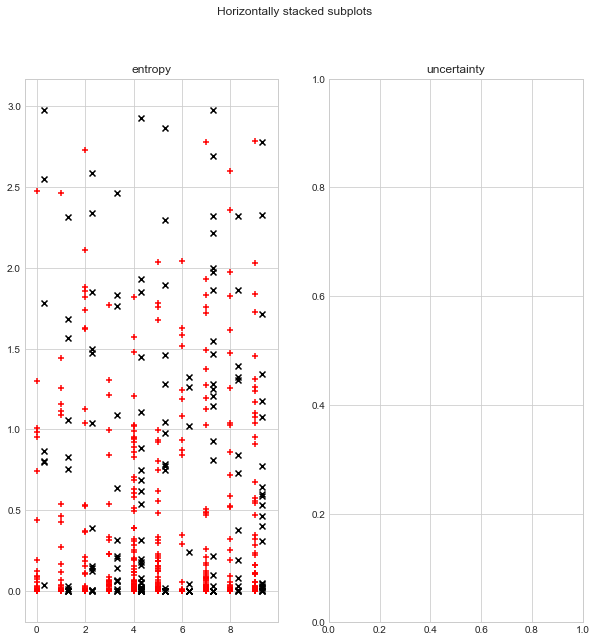

In [ ]:
###keras KL activated model 47 epochs
Predictions = displayEntropy(model,test_ds)

In [ ]:
model.save("minist_evidence")

INFO:tensorflow:Assets written to: minist_evidence\assets


In [ ]:

###keras KL activated model 47 epochs
Predictions = displayEvidence(model,test_ds)

NameError: name 'displayEvidence' is not defined

In [ ]:
def toVal(input):
    val = input.numpy()
    return val[0]
Predictions['entropy'] = Predictions['entropy'].map(toVal)
# print(Predictions.head())

       label  entropy
Acc                  
False    160      160
True    9839     9839
          label   entropy
Acc                      
False  5.062500  0.760786
True   4.433072  0.017150
          label   entropy
Acc                      
False  2.686298  0.853774
True   2.898214  0.149515
Entropy Threshold >= correct:  0.16666521702275716
Entropy
Passed correct answers: (167, 3)
Accepted incorrect answers (67, 3)


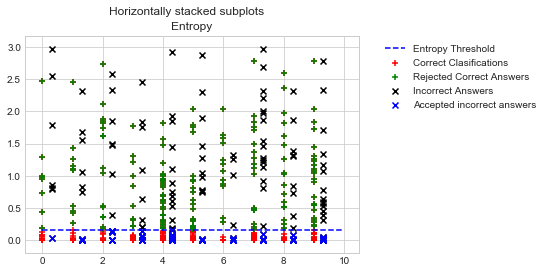

In [ ]:

print(Predictions.groupby("Acc").count())
print(Predictions.groupby("Acc").mean())
print(Predictions.groupby("Acc").std())
E_threshold = Predictions.loc[(Predictions['Acc'] == True)].groupby("Acc")["entropy"].mean() + Predictions.loc[(Predictions['Acc'] == True)].groupby("Acc")["entropy"].std()
E_threshold = E_threshold.iloc[0]
print("Entropy Threshold >= correct: ", E_threshold)

print("Entropy")
print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] >= E_threshold)].sort_values("entropy").shape)
print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] < E_threshold)].sort_values("entropy").shape)


    
correct_rows = Predictions.loc[Predictions['Acc'] == True]
incorrect_rows = Predictions.loc[Predictions['Acc'] == False]


E_correct_rows_missed = Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] >= E_threshold)].sort_values("entropy")
E_incorrect_rows_accepted = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] < E_threshold)].sort_values("entropy")

plt.suptitle('Horizontally stacked subplots')
plt.scatter(correct_rows['label'],correct_rows['entropy'],c ='r',marker='+')
plt.scatter(E_correct_rows_missed['label'],E_correct_rows_missed['entropy'],c ='g',marker='+')
plt.scatter(incorrect_rows['label']+.3,incorrect_rows['entropy'],c ='k',marker='x')
plt.scatter(E_incorrect_rows_accepted['label']+.3,E_incorrect_rows_accepted['entropy'],c ='b',marker='x')
plt.plot(np.repeat(E_threshold,11),'b--')
plt.legend(['Entropy Threshold','Correct Clasifications',"Rejected Correct Answers",'Incorrect Answers',"Accepted Incorrect Answers"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Entropy")


# plt.set_size_inches(10, 10)
plt.show()

#### Comparision

Old model: 97.98% Acc <br>
std threshold: 204 rejected correct answers, 72 accepted incorrect answers

new model: 97.92% Acc <br>
    Uncertainty: std threshold: 294 rejected correct answers, 57 accepted incorrect answers <br>
    Evidence std threshold: 1235 rejected correct answers, 18 accepted incorrect answers

Comparision method:
Acc



In [ ]:
oldAcc = 97.98
old_std = 204
old_inc = 72

newAcc = 90.34

modif = 1+ (1 -(newAcc / oldAcc))
old_std_hat = modif * old_std
old_inc_hat = modif * old_inc

print("std threshold: {} rejected correct answers, {} accepted incorrect answers".format(old_std_hat, old_inc_hat))

std threshold: 219.90691977954683 rejected correct answers, 77.61420698101652 accepted incorrect answers


In [ ]:
print(Predictions.groupby("Acc").count())
print(Predictions.groupby("Acc").mean())
print(Predictions.groupby("Acc").std())
E_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean() + Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std()
E_threshold = E_threshold.iloc[0]
print("evidence Threshold >= correct: ", E_threshold)
U_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].mean() - Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].std()
U_threshold = U_threshold.iloc[0]
print("uncertainty Threshold <= correct: ", U_threshold)

print("Uncertainty")
print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["uncertainty"] >=U_threshold)].sort_values("uncertainty").shape)
print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["uncertainty"] < U_threshold)].sort_values("uncertainty").shape)

print("Evidence")
print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] <= E_threshold)].sort_values("evidence").shape)
print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape)

fig, axs = plt.subplots(1, 2)
    
correct_rows = Predictions.loc[Predictions['Acc'] == True]
incorrect_rows = Predictions.loc[Predictions['Acc'] == False]

fig.suptitle('Horizontally stacked subplots')
axs[0].scatter(correct_rows['label'],correct_rows['evidence'],c ='r',marker='+')
axs[0].scatter(incorrect_rows['label']+.3,incorrect_rows['evidence'],c ='k',marker='x')
axs[0].plot(np.repeat(E_threshold,11),'b--')
axs[0].set_title("evidence")

axs[1].scatter(correct_rows['label'],correct_rows['uncertainty'],c ='r',marker='+')
axs[1].scatter(incorrect_rows['label']+.3,incorrect_rows['uncertainty'],c ='k',marker='x')
axs[1].plot(np.repeat(U_threshold,11),'b--')

axs[1].set_title("uncertainty")

fig.set_size_inches(10, 10)
plt.show()

       label  entropy
Acc                  
False    201      201
True    9798     9798
          label   entropy
Acc                      
False  5.333333  0.768075
True   4.424883  0.019246
          label   entropy
Acc                      
False  2.943354  0.742246
True   2.892201  0.147347


KeyError: 'Column not found: evidence'

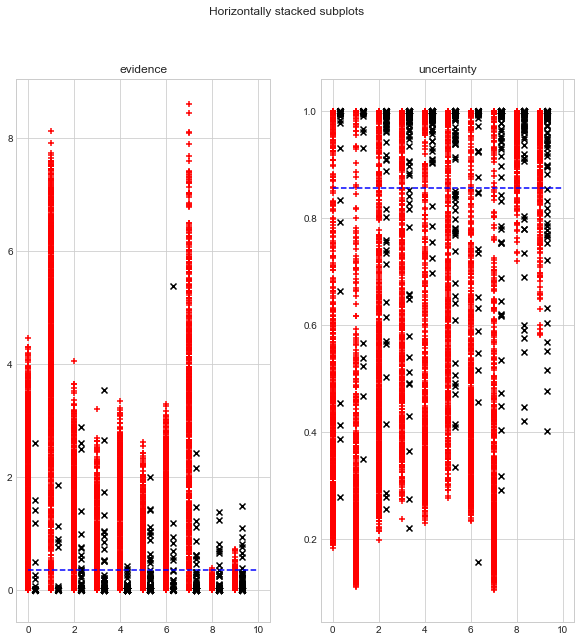

In [ ]:
fig, axs = plt.subplots(1, 2)
    
correct_rows = Predictions.loc[Predictions['Acc'] == True]
incorrect_rows = Predictions.loc[Predictions['Acc'] == False]

fig.suptitle('Horizontally stacked subplots')
axs[0].scatter(correct_rows['label'],correct_rows['evidence'],c ='r',marker='+')
axs[0].scatter(incorrect_rows['label']+.3,incorrect_rows['evidence'],c ='k',marker='x')
axs[0].plot(np.repeat(E_threshold,11),'b--')
axs[0].set_title("evidence")

axs[1].scatter(correct_rows['label'],correct_rows['uncertainty'],c ='r',marker='+')
axs[1].scatter(incorrect_rows['label']+.3,incorrect_rows['uncertainty'],c ='k',marker='x')
axs[1].plot(np.repeat(U_threshold,11),'b--')

axs[1].set_title("uncertainty")

fig.set_size_inches(10, 10)
plt.show()

In [ ]:
threshold = 0
Predictions['uncertainty'] = 10 / (10+Predictions['evidence'])
correct_rows = Predictions.loc[(Predictions['Acc'] == True) & (Predictions['evidence'] >threshold)]
incorrect_rows = Predictions.loc[(Predictions['Acc'] == False) & (Predictions['evidence'] > threshold)]
# incorrect_rows = Predictions.loc[(Predictions['evidence'] > 40)]
print(correct_rows.count())

print(incorrect_rows.count())
print(incorrect_rows.head())
# print(incorrect_rows.sort_values("evidence"))

uncertainty_correct_rows = Predictions.loc[(Predictions['Acc'] == True) & (Predictions['evidence'] >threshold)]
uncertainty_incorrect_rows = Predictions.loc[(Predictions['Acc'] == False) & (Predictions['evidence'] > threshold)]


class          977
evidence       977
Acc            977
uncertainty    977
dtype: int64
class          22
evidence       22
Acc            22
uncertainty    22
dtype: int64
     class   evidence  Acc  uncertainty
114      4  58.336926  0.0     0.146334
148      2  14.518316  0.0     0.407858
216      6  97.689018  0.0     0.092860
246      4  26.732870  0.0     0.272236
320      2  60.387310  0.0     0.142071


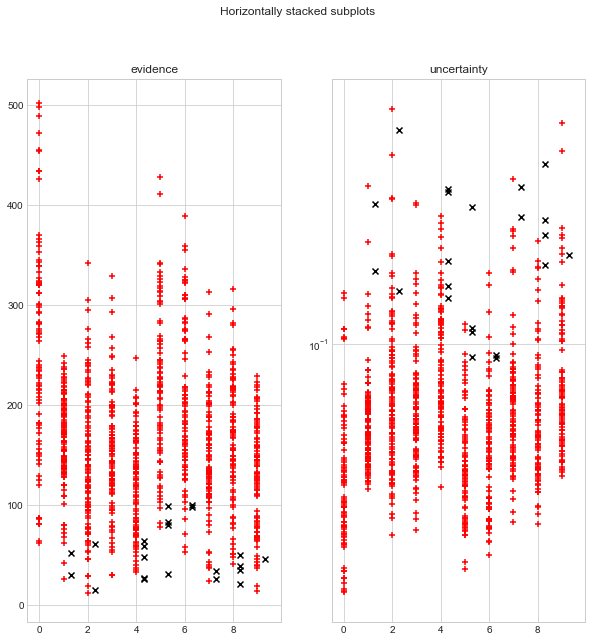

In [ ]:
fig, axs = plt.subplots(1, 2)
plt.yscale('log')
fig.suptitle('Horizontally stacked subplots')
axs[0].scatter(correct_rows['class'],correct_rows['evidence'],c ='r',marker='+')
axs[0].scatter(incorrect_rows['class']+.3,incorrect_rows['evidence'],c ='k',marker='x')
axs[0].set_title("evidence")

axs[1].scatter(correct_rows['class'],correct_rows['uncertainty'],c ='r',marker='+')
axs[1].scatter(incorrect_rows['class']+.3,incorrect_rows['uncertainty'],c ='k',marker='x')
axs[1].set_title("uncertainty")
fig.set_size_inches(10, 10)


In [ ]:
def GetResultsCSV_evidence(model,dataset,suffix="", validation=True):
        num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
        train_ds, test_ds, validation_ds = (dataset)
        predictions = []
        labels = []
        #already compiled
        # model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
        iterator = iter(test_ds)
        print(len(test_ds))

#         for j in range(len(test_ds)):
        for j in range(100):
            print("prediction: {} of {}".format(j,len(test_ds)),end='\r')
            item = iterator.get_next()
            prediction = model.predict(item[0])
            # print("predictions {}".format(prediction))
            predictions.append(prediction)
            # print(prediction)
            labels.append(item[1].numpy().tolist())
        print("labels")
        # print(labels)
        for i, val in enumerate(labels):
            # print(i)
            labels[i]= [np.argmax(val)]* num_outputs

        predEvidence_fail =[]
        predEvidence_fail_uncert =[]
        predEvidence_true = []
        predEvidence_true_uncert =[]
        predEvidence_fail_label =[]
        predEvidence_true_label =[]
        predClasses =[]
        predRaw=[]
        print("predictions complete, analyizing") 
        for i,output in enumerate(predictions):
            for k, pred in enumerate(output):

                pred_classes=[]
                pred_evidence = []
                pred_Raw=[]
                print("image: {} of {}".format(i,len(predictions)),end='\r')
                # print("output: ",i)
                if(type(pred[0])==list):
                    for l, branch in enumerate(pred):
                        pred_Raw.append(branch)
                        Pclass = np.argmax(branch)
                        pred_classes.append(Pclass) 
                        evidence = exp_evidence(branch).numpy()
                        total_evidence = evidence
                        match = tf.reshape(tf.cast(tf.equal(Pclass, labels[i]), tf.float32),(-1,1))                    
                        if l !=0:
                            if match.numpy()[0]==0:
                                # print("match", match.numpy(),total_evidence.numpy())
                                
                                ev_fail = evidence + 1
                                predEvidence_fail.append(ev_fail.numpy())
                                predEvidence_fail_uncert.append(K / ev_fail.numpy())
                                predEvidence_fail_label.append(labels[i][0])
                            else:
                                # print(labels[i])

                                ev_succ = evidence
                                predEvidence_true.append(ev_succ)
                                predEvidence_true_uncert.append(K /ev_succ.numpy())
                                predEvidence_true_label.append(labels[i][0])
                                                
                            # print(total_evidence.numpy())
                        pred_evidence.append(total_evidence)
                else:
                    # print("predictions", pred)

                    pred_Raw.append(pred)
                    Pclass = np.argmax(pred)
                    pred_classes.append(Pclass) 
                    evidence = tf.reduce_sum(exp_evidence(pred)).numpy()
                    # print(evidence)
                    total_evidence = evidence
                    match = tf.reshape(tf.cast(tf.equal(Pclass, labels[i]), tf.float32),(-1,1))  
                    # print(match)                  
                    if match.numpy()[0]==0:
                        # print("fail")
                        # print("match", match.numpy(),total_evidence.numpy())
                        
                        ev_fail = (evidence)*(1-0) / (1+1e-20) 
                        predEvidence_fail.append(ev_fail)
                        predEvidence_fail_uncert.append(K/ (K + ev_fail))
                        predEvidence_fail_label.append(labels[i][0])
                    else:
                        # print(labels[i])

                        ev_succ = (evidence)*1 / (1+1e-20)
                        predEvidence_true.append(ev_succ)
                        predEvidence_true_uncert.append(K/ (K + ev_succ))
                        predEvidence_true_label.append(labels[i][0])
                                            
                        # print(total_evidence.numpy())
                    pred_evidence.append(total_evidence)
        
              
        labelClasses = [0,1,2,3,4,5,6,7,8,9]
        # predClasses = pd.DataFrame(predClasses)
        labels = pd.DataFrame(labels)
        predEvidence_fail = pd.DataFrame([predEvidence_fail])
        predEvidence_true = pd.DataFrame([predEvidence_true])
        
        import matplotlib.pyplot as plt

        # predEvidence_true = [K / K+ x for x in predEvidence_true]
        # predEvidence_fail = [K / K+ x for x in predEvidence_fail]

        # print(len(predEvidence_true))
        # print(len(predEvidence_true_label))
        print("mean Success: ",tf.reduce_mean(predEvidence_true))
        # print(predEvidence_true)
        print("mean Fail: ",tf.reduce_mean(predEvidence_fail))

        predEvidence_fail_label = [x+.2 for x in predEvidence_fail_label]
        fig, axs = plt.subplots(1, 2)
        fig.suptitle('Horizontally stacked subplots')
        axs[0].scatter(predEvidence_true_label,predEvidence_true,c ='r',marker='+')
        axs[0].scatter(predEvidence_fail_label,predEvidence_fail,c ='k',marker='x')
        axs[0].set_title("evidence")

        axs[1].scatter(predEvidence_true_label,predEvidence_true_uncert,c ='r',marker='*')
        axs[1].scatter(predEvidence_fail_label,predEvidence_fail_uncert,c ='k',marker='*')
        axs[1].set_title("uncertainty")

        fig.set_size_inches(10, 10)
        plt.show()
        
        
        
        return
        
        

10000
labelstion: 9999 of 10000
predictions complete, analyizing
mean Success:  tf.Tensor(11.712669773054586, shape=(), dtype=float64)
mean Fail:  tf.Tensor(11.542338025336171, shape=(), dtype=float64)


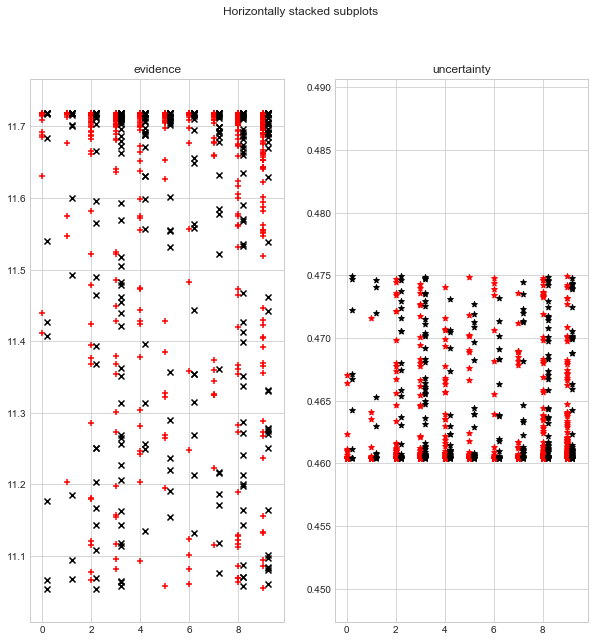

In [ ]:
results = GetResultsCSV_evidence(model,(train_ds, test_ds, validation_ds),suffix="new_model", validation=True)

10000
labelstion: 99 of 10000
predictions complete, analyizing
mean Success:  tf.Tensor(11.716626070966624, shape=(), dtype=float64)
mean Fail:  tf.Tensor(11.55577278137207, shape=(), dtype=float64)


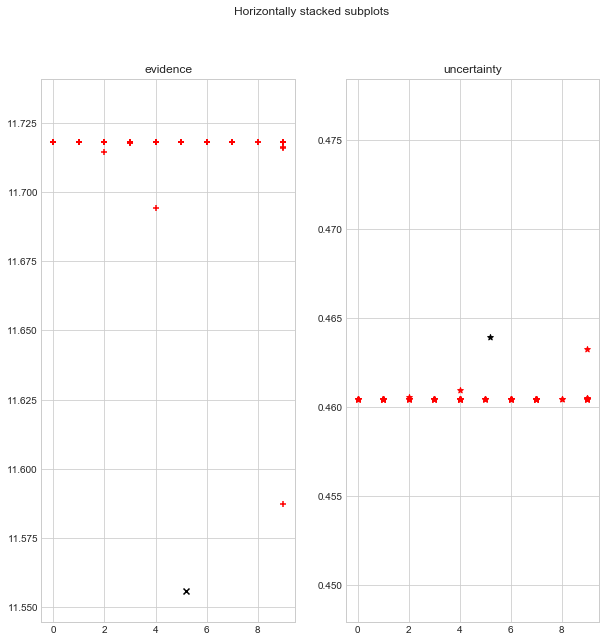

In [ ]:
results = GetResultsCSV_evidence(model,(train_ds, test_ds, validation_ds),suffix="new_model", validation=True)

In [ ]:
results.head()

AttributeError: 'NoneType' object has no attribute 'head'